In [5]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib 
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.2 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.1 MB 997.4 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.1 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.1 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.1 MB 1.4 MB/s eta 0:00:07
   ------- -----------

In [6]:
import os

path = os.listdir('C:/Users/tasmi/Desktop/brain_tumor/brain_tumor/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [11]:
!pip install opencv-python
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/tasmi/Desktop/brain_tumor/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

Defaulting to user installation because normal site-packages is not writeable


In [12]:
np.unique(Y)

array([0, 1])

In [17]:
X=np.array(X)
Y=np.array(Y)

In [18]:
pd.Series(Y).value_counts()

0    180
1    132
Name: count, dtype: int64

In [19]:
X.shape

(312, 200, 200)

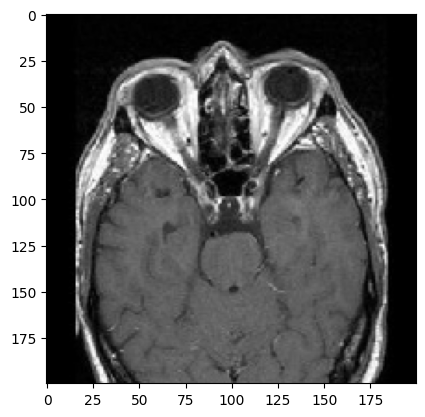

In [20]:
plt.imshow(X[0], cmap='gray')

In [21]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(312, 40000)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [23]:
xtrain.shape, xtest.shape

((249, 40000), (63, 40000))

In [24]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [25]:
from sklearn.decomposition import PCA

In [26]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(249, 40000) (63, 40000)


In [27]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [30]:
sv = SVC()
sv.fit(xtrain, ytrain)


SVC()

In [31]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9841269841269841


In [32]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9919678714859438
Testing Score: 0.9682539682539683


In [33]:
pred = sv.predict(xtest)


In [34]:
misclassified=np.where(ytest!=pred)
misclassified

(array([18, 39]),)

In [35]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[39],ytest[39])

Total Misclassified Samples:  2
1 0


In [36]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

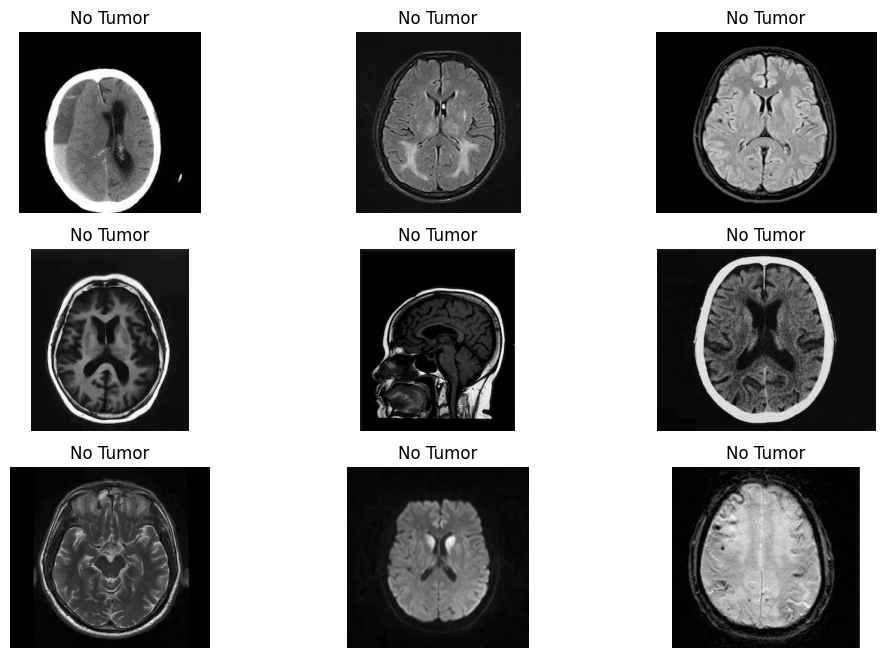

In [38]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/tasmi/Desktop/brain_tumor/brain_tumor/Testing/')
c=1
for i in os.listdir('C:/Users/tasmi/Desktop/brain_tumor/brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/tasmi/Desktop/brain_tumor/brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

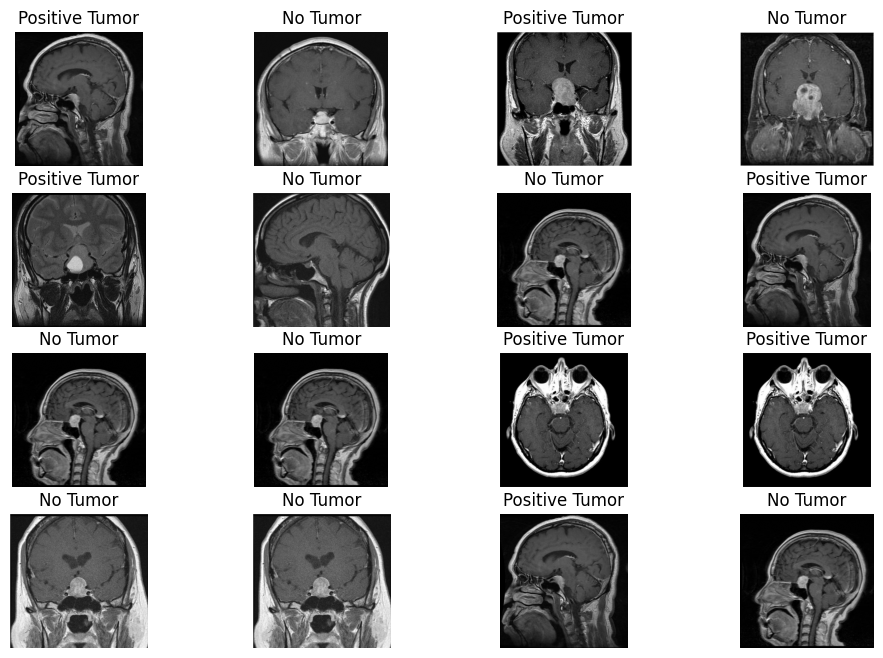

In [40]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/tasmi/Desktop/brain_tumor/brain_tumor/Testing/')
c=1
for i in os.listdir('C:/Users/tasmi/Desktop/brain_tumor/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/tasmi/Desktop/brain_tumor/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1